### Import

In [1]:
import networkx as nx

### Yen's algorithm

In [2]:
def yen_k_shortest_path(G, source, target, k):
    paths = []
    paths_length = []
    candidates = []
    candidates_length = []
    
    path = [p for p in nx.shortest_path(G, source, target, weight = "weight")]
    paths.append(path)
    path_length = nx.path_weight(G, path, weight = "weight" )
    paths_length.append(path_length)
    root_path = paths[-1]
    
    for i in range(k-1):
        G_interim = G.copy()
        make_candidates_list_and_length(G_interim, G, candidates, candidates_length, target, root_path, paths)
        ind = candidates_length.index(min(candidates_length))
        paths.append(candidates.pop(ind))
        paths_length.append(candidates_length.pop(ind))
        root_path = paths[-1]
    
        
    return paths, paths_length

In [3]:
def make_candidates_list_and_length(G_interim, G, candidates, candidates_length, target, root_path, paths):
    spur_nodes = []
    for spur_source in root_path:
        if spur_source != target:
            edges_for_graph = remove_edges_from_paths(G_interim, spur_source, spur_nodes, paths)
            if nx.has_path(G_interim, spur_source, target):
                spur_path = [p for p in nx.bellman_ford_path(G_interim, spur_source, target, weight = "weight")]
                total_path = spur_nodes + spur_path
                if total_path not in candidates:
                    candidates.append(total_path)
                    total_length = nx.path_weight(G, total_path, weight = "weight" )
                    candidates_length.append(total_length)
                spur_nodes.append(spur_source)
                G_interim.add_edges_from(edges_for_graph)
                for node in spur_nodes:
                    if node in G_interim:
                        G_interim.remove_node(node)
    return candidates, candidates_length

In [4]:
def remove_edges_from_paths(G, node, spur_nodes, paths):
    edges_to_remove = []
    edges_for_graph = []
    for path in paths:
        if spur_nodes == path[0:len(spur_nodes)]:
            for p in path:
                if p == node:
                    edge = [node, path[path.index(p) + 1]]
                    edge_weight = G.edges[edge]["weight"]
                    if edge not in edges_to_remove:
                        edges_to_remove.append(edge)
                        edges_for_graph.append([edge[0], edge[1], {'weight': edge_weight}])
    for edge in edges_to_remove:
            G.remove_edge(edge[0], edge[1])
    return edges_for_graph

### Example

In [9]:
G = nx.DiGraph()

In [10]:
G.add_edges_from([(0, 1, {'weight': 2}),(0, 2, {'weight': 6}),(0, 3, {'weight': 8}),(0, 6, {'weight': 3}),
                 (1, 0, {'weight': 2}),(1, 2, {'weight': 9}),(1, 3, {'weight': 3}),(1, 5, {'weight': 4}),
                 (1, 6, {'weight': 9}),(2, 0, {'weight': 6}),(2, 1, {'weight': 9}),(2, 3, {'weight': 7}),
                 (3, 0, {'weight': 8}),(3, 1, {'weight': 3}),(3, 2, {'weight': 7}),(3, 4, {'weight': 5}),
                 (3, 5, {'weight': 5}),(4, 3, {'weight': 5}),(4, 6, {'weight': 8}),(4, 7, {'weight': 9}),
                 (5, 1, {'weight': 4}),(5, 3, {'weight': 5}),(5, 7, {'weight': 6}),(5, 8, {'weight': 4}),
                 (6, 0, {'weight': 3}),(6, 1, {'weight': 9}),(6, 4, {'weight': 8}),(7, 4, {'weight': 9}),
                 (7, 5, {'weight': 6}),(7, 8, {'weight': 1}),(8, 5, {'weight': 4}),(8, 7, {'weight': 1})])

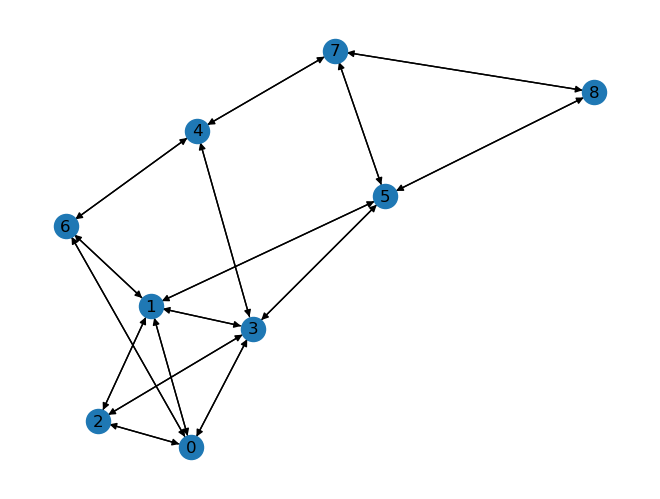

In [11]:
nx.draw(G, with_labels = True)

In [12]:
yen_k_shortest_path(G, 0, 7, 10)

([[0, 1, 5, 8, 7],
  [0, 1, 5, 7],
  [0, 1, 3, 5, 8, 7],
  [0, 1, 3, 5, 7],
  [0, 3, 5, 8, 7],
  [0, 1, 3, 4, 7],
  [0, 3, 5, 7],
  [0, 6, 4, 7],
  [0, 3, 1, 5, 8, 7],
  [0, 6, 1, 5, 8, 7]],
 [11, 12, 15, 16, 18, 19, 19, 20, 20, 21])